[View in Colaboratory](https://colab.research.google.com/github/SwapnilSParkhe/FAST_AI/blob/master/FASTAI_Lesson1.ipynb)

#Fast.ai Course  
## Lesson-1: Image Classification - Cats Vs Dogs

### Step-0: Calibrate platforms (Setting-up compatibile interface btwn Google Colab and fast.ai) 

**Check if GPU running**

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

**Installing required and dependent libraries on Colab for fast.ai**

In [0]:
#FASTAI lib (use this to remove '!rm -rf fastai')
!pip install fastai

#FASTAI dependencies - Pytorch & LibSim libs
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

#Others libs - Pillow, PIL, Image - For image
!pip install Pillow==4.0.0
!pip install image
import cv2
from os import path

#IMPORTANT STUFF - to enable smooth runs without memory issues
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

### Step-1: Importing relevant libraries and modules for analysis

In [6]:
#Library and modules
from fastai.imports import *   #main library
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

#To get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Step-2: Download dataset

In [0]:
#Making directory 'data' -> getting our data from the web ->unzipping zipped data to 'data' dir
!mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/

### Step-3: Inspect data (and wrangle if required)

**Checking Directory Contents**

In [4]:
#Defining the sub-dir path
PATH = "data/dogscats"

#What folders/files do we have in sub-dir
!ls {PATH}
!ls {PATH}/valid
files = !ls {PATH}/valid/cats | head
files

models	sample	test1  train  valid
cats  dogs


['cat.10016.jpg',
 'cat.1001.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg',
 'cat.10064.jpg',
 'cat.10071.jpg',
 'cat.10091.jpg',
 'cat.10103.jpg',
 'cat.10104.jpg']

**Checking some data**

(299, 341, 3)

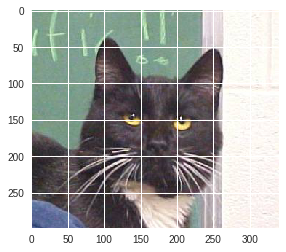

In [15]:
#Using plt's commands to read (path) and show image
##Note: Using Python string formating options f'{python_objects_or_funtions}'
img=plt.imread(f'{PATH}/valid/cats/{files[8]}')
plt.imshow(img)

#Dimensions of image - height vs width
img.shape

**Importing data and creating data-model pipeline**

In [0]:
#Creating an image classifier data object using a fastai defined class (that points to folder having images and in parallel applying transformations)
data=ImageClassifierData.from_paths(path=PATH, bs=32, tfms=tfms_from_model(resnet34,224))  


### Step-4: Train Model 
Note: 
  1. First, using transfer learning to leverage a pre-trained 'resnet34' model
  2. Later, we could fine tune the pre-trained model appropriately to achieve better results

In [5]:
#Creating a learner object using a fastai defined class (that leverages predefined convnet models)
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

#Fitting the learner object (having learning rate and epochs as arguments)
learn.fit(0.01,3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 44786639.58it/s]


100%|██████████| 63/63 [00:15<00:00,  3.97it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.054004   0.032513   0.986     
 39%|███▊      | 278/719 [00:06<00:10, 40.19it/s, loss=0.0691]

    1      0.062124   0.033558   0.989     
 79%|███████▉  | 568/719 [00:13<00:03, 40.57it/s, loss=0.0404]

    2      0.062472   0.025068   0.992     



[array([0.02507]), 0.992]

### Step-5: Analytise Results (to see where we failed, & focus there to further improve)
Note: As well as looking at the overall metrics, looking at examples of each of:

  1. A few correct labels at random
  2. A few incorrect labels at random
  3. The most correct labels of each class (i.e. those with highest probability that are correct)
  4. The most incorrect labels of each class (i.e. those with highest probability that are incorrect)
  5. The most uncertain labels (i.e. those with probability closest to 0.5)

**Predictions**

In [26]:
#Predicitons' Key (Actual 0 means cats, and vice-versa)
print(data.val_y)
print(data.classes,'\n')

#Predictions (Note: by default they are log preds in PyTorch)
log_preds=learn.predict()
print(log_preds)
print(log_preds.shape)

[0 0 0 ... 1 1 1]
['cats', 'dogs'] 

[[ -0.0002   -8.51681]
 [ -0.00022  -8.40591]
 [ -0.01054  -4.5578 ]
 ...
 [ -7.73322  -0.00044]
 [-10.05474  -0.00004]
 [ -4.64123  -0.00969]]
(2000, 2)


[[ -0.0002   -8.51681]
 [ -0.00022  -8.40591]
 [ -0.0005   -7.60381]
 ...
 [ -7.73322  -0.00044]
 [-10.05474  -0.00004]
 [ -4.64123  -0.00969]]
(2000, 2)
